In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os 
main_dir = '/content/datasets/Data'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [ ]:
print(train_dir,train_covid_dir)

/content/datasets/Data/train /content/datasets/Data/train/COVID19


In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(97).jpg', 'COVID-19 (168).jpg', 'COVID19(511).jpg', 'COVID19(155).jpg', 'COVID19(20).jpg', 'COVID19(470).jpg', 'COVID19(516).jpg', 'COVID19(301).jpg', 'COVID19(401).jpg', 'COVID19(493).jpg']
['NORMAL(469).jpg', 'NORMAL(1176).jpg', 'NORMAL(453).jpg', 'NORMAL(333).jpg', 'NORMAL(134).jpg', 'NORMAL(711).jpg', 'NORMAL(431).jpg', 'NORMAL(1398).jpg', 'NORMAL(1259).jpg', 'NORMAL(1110).jpg']
['COVID-19 (718).jpg', 'COVID19(100).jpg', 'COVID19(207).jpg', 'COVID19(79).jpg', 'COVID-19 (547).jpg', 'COVID-19 (839).jpg', 'COVID19(194).jpg', 'COVID19(472).jpg', 'COVID-19 (609).jpg', 'COVID-19 (876).jpg']
['NORMAL(324).jpg', 'NORMAL(1537).jpg', 'NORMAL(1344).jpg', 'NORMAL(1100).jpg', 'NORMAL(709).jpg', 'NORMAL(1271).jpg', 'NORMAL(1579).jpg', 'NORMAL(1508).jpg', 'NORMAL(833).jpg', 'NORMAL(1043).jpg']


In [ ]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))


train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


['/content/datasets/Data/train/COVID19/COVID19(97).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (168).jpg', '/content/datasets/Data/train/COVID19/COVID19(511).jpg', '/content/datasets/Data/train/COVID19/COVID19(155).jpg', '/content/datasets/Data/train/COVID19/COVID19(20).jpg', '/content/datasets/Data/train/COVID19/COVID19(470).jpg', '/content/datasets/Data/train/COVID19/COVID19(516).jpg', '/content/datasets/Data/train/COVID19/COVID19(301).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(469).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1176).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(453).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(333).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(134).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(711).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(431).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1398).jpg']


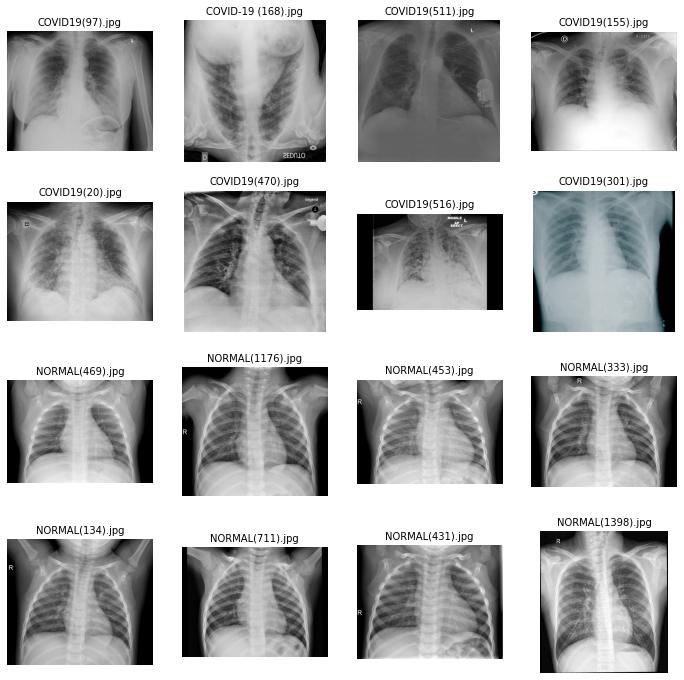

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                               

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator,
                              epochs=20,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/20
46/46 [==============================] - 51s 992ms/step - loss: 2.3307 - accuracy: 0.6736 - val_loss: 0.4184 - val_accuracy: 0.8906
Epoch 2/20
46/46 [==============================] - 45s 983ms/step - loss: 0.2800 - accuracy: 0.8964 - val_loss: 0.2784 - val_accuracy: 0.8938
Epoch 3/20
46/46 [==============================] - 45s 973ms/step - loss: 0.2203 - accuracy: 0.9078 - val_loss: 0.1386 - val_accuracy: 0.9563
Epoch 4/20
46/46 [==============================] - 45s 978ms/step - loss: 0.1829 - accuracy: 0.9428 - val_loss: 0.1549 - val_accuracy: 0.9406
Epoch 5/20
46/46 [==============================] - 44s 968ms/step - loss: 0.1369 - accuracy: 0.9502 - val_loss: 0.1838 - val_accuracy: 0.9500
Epoch 6/20
46/46 [==============================] - 45s 967ms/step - loss: 0.1609 - accuracy: 0.9512 - val_loss: 0.1087 - val_accuracy: 0.9594
Epoch 7/20
46/46 [==============================] - 45s 977ms/step - loss: 0.1649 - accuracy: 0.9334 - val_loss: 0.1094 - val_accuracy: 0.9563

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

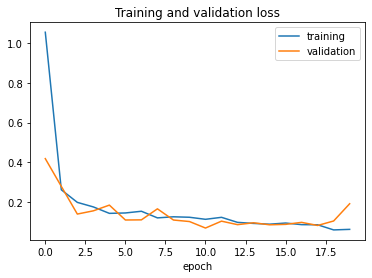

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

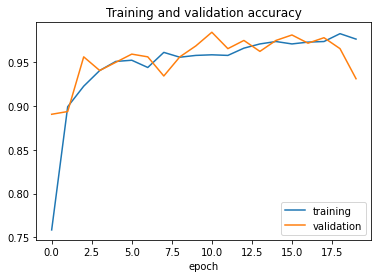

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 10s 594ms/step - loss: 0.0928 - accuracy: 0.9669
test acc :0.9669421315193176 test loss:0.0927514135837555


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  # print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print("-"*15)
  if classes==0:
    print('Covid19 + (positive)')
  else:
    print('Normal - (negative)')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>